In [57]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

### Task 1: Data Preprocessing and EDA

In [40]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.
df = pd.read_csv(r"hotel_reservations.csv")

# Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (36275, 19)
First few rows of the dataset:


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [41]:
#Copy the dataset to df_copy variable to preserve the exisiting dataset
df_copy = df

In [43]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date
df2 = df.drop(['booking_id', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1)

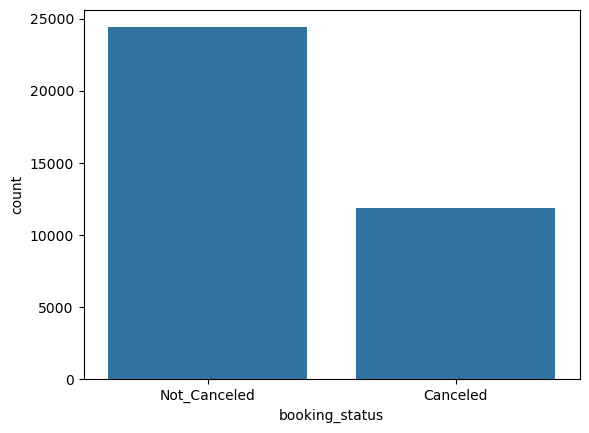

In [44]:
# Visualize the booking_status
sns.countplot(x='booking_status', data=df2)
plt.show()

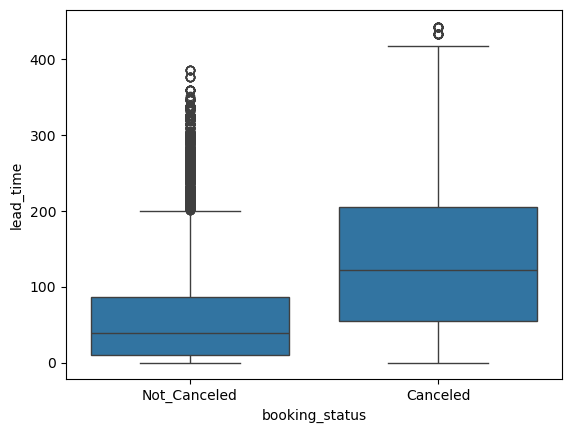

In [45]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
sns.boxplot(x='booking_status', y='lead_time', data=df2)
plt.show()

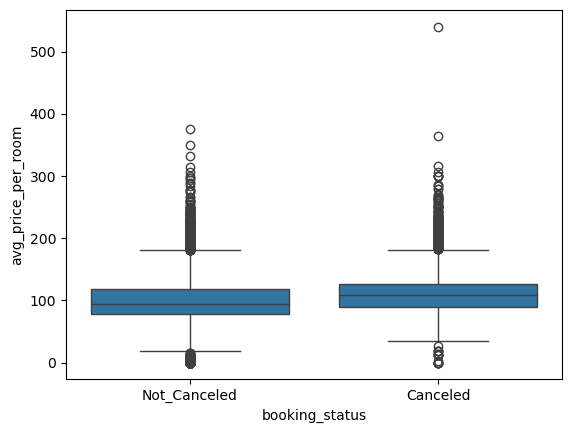

In [46]:
# Visualize the average price per room for canceled and not canceled bookings
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df2)
plt.show() 

In [47]:
#Check the dataset 

df2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled


### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [48]:
#Copying to orignal for saftey
df_original = df2.copy()  # Save a copy before encoding
df2 = pd.get_dummies(df_original, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)


In [49]:
df2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
df2[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df2[['lead_time', 'avg_price_per_room']])


#Encode the booking_Status as Cancelled : 1 and NotCancelled : 0 

df2['booking_status'] = df2['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})


### Model Training & Evalution using CV & Grid Search CV

In [52]:
# Define features(X) and target (y: booking_status)

X = df2.drop(['booking_status'], axis=1)
y = df2['booking_status']

### Task 3: Implementing K-Fold Cross Validation
1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
# Initialize KFold with 7 splits.
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Cross validation with Naive Bayes
nb_model = GaussianNB()
nb_cv_score = cross_val_score(nb_model, X, y, cv=kf, scoring="accuracy")
print("Naive Bayes Cross-Validation Accuracy: ", nb_cv_score.mean())

# Cross validation with Logistic Regression
lr_model = LogisticRegression()
lr_cv_score = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
print("Logistic Regression Cross-Validation Accuracy: ", lr_cv_score.mean())


# Cross validation with Decision Tree
dt_model = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_model, X, y, cv=kf, scoring="accuracy")
print("Decision Tree Cross-Validation Accuracy: ", dt_cv_score.mean())
 
# Cross validation with RandomForest
rf_model = RandomForestClassifier()
rf_cv_score = cross_val_score(rf_model, X, y, cv=kf, scoring="accuracy")
print("Random Forest Cross-Validation Accuracy: ", rf_cv_score.mean())

# Cross validation with XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_cv_score = cross_val_score(xgb_model, X, y, cv=kf, scoring="accuracy")
print("XGBoost Cross-Validation Accuracy: ", xgb_cv_score.mean())




Naive Bayes Cross-Validation Accuracy:  0.4086008945293444
Logistic Regression Cross-Validation Accuracy:  0.8004685935356991
Decision Tree Cross-Validation Accuracy:  0.8596830981926304
Random Forest Cross-Validation Accuracy:  0.8886837305163092
XGBoost Cross-Validation Accuracy:  0.8806892895096


### Model Performance Comparison  

The cross-validation results show that **Naive Bayes** performed the worst, with an accuracy of **40.86%**, likely due to its strong independence assumptions. 
**Logistic Regression** improved significantly with **80.05%**, benefiting from its linear decision boundary. 
**Decision Tree** performed even better at **85.97%**, capturing complex patterns in the data. 
**Random Forest** further boosted accuracy to **88.87%** by combining multiple decision trees. 
**XGBoost** also achieved strong performance at **88.07%**, leveraging gradient boosting for improved predictive power. 
Overall, **Random Forest** provided the best accuracy in this experiment.


### Implementing Grid Search CV

In [ ]:
# Define model parameters for GridSearchCV
model_params = {
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'xgboost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Fit GridSearchCV for all models and find the best parameters
scores = []
for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=5,
        return_train_score=False,
        n_jobs=-1  # Use all available cores
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Print the best parameters for each model
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df_scores['xgboost']

,model,best_score,best_params
0,naive_bayes,0.409373,{'var_smoothing': 1e-07}
1,random_forest,0.876940,"{'max_depth': 15, 'n_estimators': 100}"
2,decision_tree,0.869028,"{'max_depth': 15, 'min_samples_split': 5}"
3,xgboost,0.884935,"{'learning_rate': 0.2, 'max_depth': 9, 'n_esti..."
4,svm,0.835231,"{'C': 10, 'kernel': 'rbf'}"


In [61]:
print(df_scores.to_string())

           model  best_score                                                  best_params
0    naive_bayes    0.409373                                     {'var_smoothing': 1e-07}
1  random_forest    0.876940                       {'max_depth': 15, 'n_estimators': 100}
2  decision_tree    0.869028                    {'max_depth': 15, 'min_samples_split': 5}
3        xgboost    0.884935  {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
4            svm    0.835231                                   {'C': 10, 'kernel': 'rbf'}


Best on Grid Search CV, We selected XGBoost as the final model because it achieved the highest cross-validation accuracy (88.49%) in GridSearchCV. It consistently outperformed other models, demonstrating strong generalization on the dataset. With optimized hyperparameters (n_estimators=200, max_depth=9, learning_rate=0.2), XGBoost provides a balance between performance and efficiency, making it the best choice for deployment.

In [ ]:
### Model Selection XGBoost

# Creating Train_Test_Split

In [84]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [91]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.2)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [92]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model_xgb.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8923501033769814
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4878
           1       0.86      0.80      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255



In [87]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score , f1_score


In [93]:

# Compute metrics
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1] 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc}")

Precision: 0.8647
Recall: 0.7960
F1 Score: 0.8289
AUC: 0.9498387495444159
